In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
nubb = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_nodiff_reco.h5", "data")
nubb_meta = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_nodiff_reco.h5", "meta")
display(nubb)
display(nubb_meta)

# Load the dictionary back from the pickle file (binary mode)
with open("../data/Trackreco/ATPC_0nubb_1bar_nodiff_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_nubb      = pickle.load(pickle_file)
    connections_nubb = pickle.load(pickle_file)
    connection_counts_nubb = pickle.load(pickle_file)

Tl = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_nodiff_reco.h5", "data")
Tl_meta = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_nodiff_reco.h5", "meta")
display(Tl)
display(Tl_meta)

# Load the dictionary back from the pickle file (binary mode)
with open("../data/Trackreco/ATPC_Tl_1bar_nodiff_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_Tl      = pickle.load(pickle_file)
    connections_Tl = pickle.load(pickle_file)
    connection_counts_Tl = pickle.load(pickle_file)




,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle,Tortuosity
0,125,-1903.222046,-1298.644938,1487.571655,0.141236,14,1,0,0.000000,0.000000,1.753804
1,125,-1924.799316,-1312.026245,1478.012878,0.025941,12,1,0,27.129471,25.849308,2.334197
2,125,-1930.393433,-1328.148560,1465.277344,0.018154,10,1,0,48.423062,37.520830,2.309231
3,125,-1906.222371,-1335.432576,1453.564819,0.032265,9,1,0,76.252548,77.190344,2.451175
4,125,-1892.235229,-1365.352539,1447.470459,0.020460,0,1,0,109.838044,47.835838,2.666347
...,...,...,...,...,...,...,...,...,...,...,...
147,1309,-1737.257141,2332.912598,617.453522,0.008630,94,1,0,3445.912803,68.557021,1.589627
148,1309,-1758.253499,2318.273031,619.403239,0.053841,92,1,0,3471.583124,67.188117,1.733869
149,1309,-1759.325073,2309.595703,623.264587,0.038713,89,1,0,3481.141068,50.198306,1.903926
150,1309,-1776.827759,2315.192627,632.481201,0.063662,91,1,0,3501.698682,88.315006,2.094955


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,125,0,1,14,111,3339.136,2.457110,0.625530,0.545402,2.199838,2.334565,Primary
0,126,0,1,35,64,3483.548,2.437890,0.598350,0.569433,1.835691,2.562163,Primary
0,126,1,0,0,0,0.000,0.022494,0.022494,0.022494,1.000000,1.000000,Brem
0,127,0,1,117,118,2858.363,2.300101,0.549494,0.508871,2.774625,1.925596,Primary
0,127,1,0,0,0,0.000,0.029537,0.029537,0.029537,1.000000,1.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1308,1,0,15,15,0.000,0.030157,0.030157,0.030157,1.000000,1.000000,Brem
0,1308,2,0,20,20,0.000,0.060066,0.060066,0.060066,1.000000,1.000000,Brem
0,1308,3,0,63,63,0.000,0.030281,0.030281,0.030281,1.000000,1.000000,Brem
0,1309,0,1,22,91,3501.699,2.434517,0.541880,0.518965,3.003698,1.610181,Primary


,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle,Tortuosity
0,126000,-858.295135,888.656494,2253.111694,0.010490,82,1,0,0.000000,0.000000,1.010562
1,126000,-847.358276,872.564636,2249.312500,0.008878,80,1,0,19.824143,108.325910,1.009416
2,126000,-842.242737,864.213501,2247.264648,0.005878,78,1,0,29.829337,2.765453,1.019767
3,126000,-834.186737,848.861511,2243.920532,0.009027,76,1,0,47.486229,3.832399,1.036883
4,126000,-824.459961,823.736979,2236.411051,0.018848,71,1,0,75.454865,7.874077,1.046066
...,...,...,...,...,...,...,...,...,...,...,...
126,360059,-277.021729,-2549.601807,2583.852051,0.008085,95,0,1,87.096192,38.955764,1.182740
127,360059,-278.041519,-2567.083984,2571.078125,0.023510,85,0,1,108.771978,60.102902,1.182740
128,360059,-262.410660,-2574.370728,2559.272949,0.035935,81,0,1,129.671322,54.626934,1.182740
129,360059,-247.821480,-2573.997681,2543.334717,0.036382,82,0,1,151.281749,23.724144,1.223980


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,126000,0,1,82,120,68.675,2.049274,0.590786,0.261863,2.865280,1.038937,Primary
0,126000,1,0,52,52,0.000,0.029735,0.029735,0.029735,1.000000,1.000000,Brem
0,126000,2,0,137,139,68.675,0.165912,0.165912,0.165912,1.256059,1.256059,Brem
0,126000,3,0,132,134,22.235,0.090594,0.090594,0.090594,1.008913,1.008913,Brem
0,126000,4,0,135,136,22.235,0.143344,0.143344,0.143344,1.000000,1.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...
0,360057,3,0,144,146,32.627,0.141137,0.141137,0.141137,1.135385,1.135385,Brem
0,360058,0,1,0,66,53.973,2.133792,0.515394,0.341149,2.256718,1.022118,Primary
0,360058,1,0,146,149,53.973,0.184785,0.184785,0.184785,1.069090,1.069090,Brem
0,360059,0,1,45,48,2346.758,2.022291,0.613205,0.243065,3.258269,1.040130,Primary


In [3]:
print(len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()))

175507
170937


{0: [1, 3], 1: [0, 2], 2: [1, 4], 3: [0, 5], 4: [7, 2], 7: [4, 12], 5: [3, 6], 6: [8, 5], 8: [6, 9], 9: [8, 11], 10: [11, 14], 11: [10, 9], 12: [7, 21], 13: [16, 15], 16: [13, 18], 14: [19, 10], 19: [14, 25], 15: [17, 13], 17: [15, 20], 18: [16, 22], 22: [18, 26], 20: [23, 17], 23: [20, 24], 21: [28, 12], 28: [21, 39], 24: [23, 29], 25: [30, 19], 30: [25, 32], 26: [22, 34], 27: [31, 41], 31: [27, 36], 39: [28, 48], 29: [24, 35], 36: [31, 43], 32: [33, 30], 33: [32, 37], 37: [33, 40], 34: [26, 52], 35: [38, 29], 38: [35, 45], 45: [38, 50], 40: [37, 47], 41: [42, 27], 42: [41, 44], 44: [42, 46], 43: [36, 51], 46: [44, 49], 47: [40, 56], 48: [59, 39], 59: [48, 67], 49: [55, 46], 55: [49, 62], 50: [45, 53], 51: [58, 43], 58: [51, 69], 52: [34, 71], 53: [54, 50], 54: [53, 57], 56: [47, 60], 57: [54, 61], 67: [59, 72], 60: [63, 56], 63: [60, 64], 61: [66, 57], 66: [61, 65], 62: [55, 68], 64: [63, 65], 65: [66, 64], 68: [62, 70], 69: [58, 76], 70: [73, 68], 73: [70, 78], 71: [77, 52], 77: [71

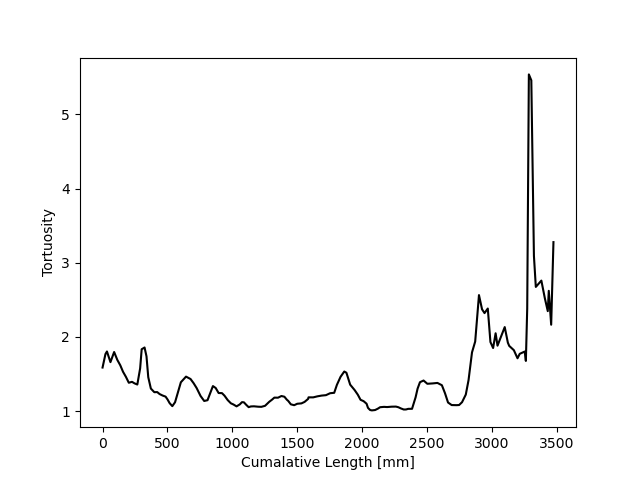

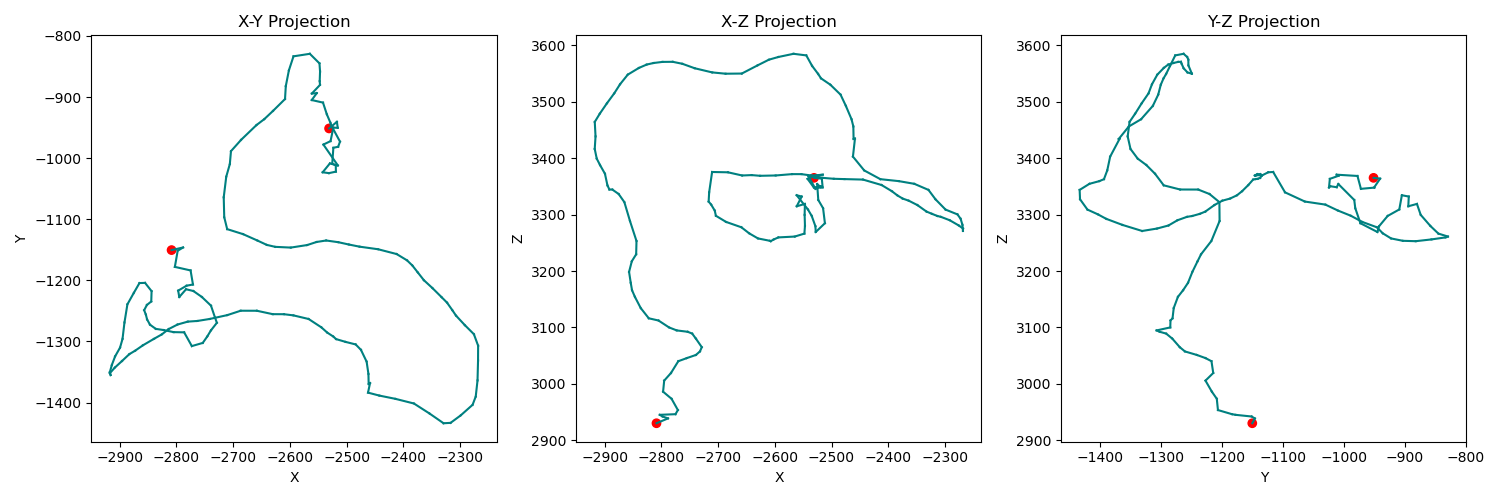

In [118]:
%matplotlib widget


# evid = 26984036
evid= Tl_topology_evts[16]

# event = Tl[Tl.event_id == evid]
# event.index = event.id
# Track = Tracks_Tl[evid]
# connection = connections_Tl[evid]
# connection_count = connection_counts_Tl[evid]


evid=nubb_topology_evts[8]
event = nubb[nubb.event_id == evid]
event.index = event.id
Track = Tracks_nubb[evid]
connection = connections_nubb[evid]
connection_count = connection_counts_nubb[evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

plt.tight_layout()

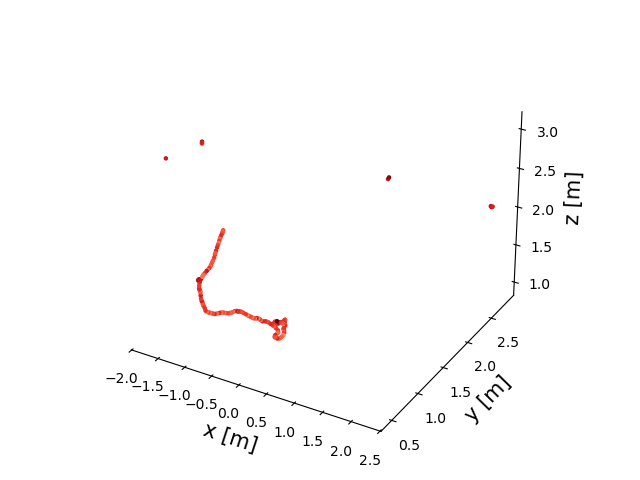

In [ ]:
# 3D event display
%matplotlib widget


ids = Tl.event_id.unique()
# id_ = ids[48]
id_ = 126000

event = Tl[Tl.event_id == id_]

ax = plt.figure().add_subplot(projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.scatter(event.x/1000,event.y/1000, event.z/1000, c = event.energy, s = 5, cmap='BuGn', alpha=1, norm=mcolors.LogNorm())
ax.scatter(event.x/1000,event.y/1000, event.z/1000, c = event.energy, s = 5, cmap='Reds', alpha=1, norm=mcolors.LogNorm())


ax.set_xlabel("x [m]", fontsize = 15)
ax.set_ylabel("y [m]", fontsize = 15)
ax.set_zlabel("z [m]", fontsize = 15)
ax.tick_params(axis='both', which='both', labelsize=10)  # Adjust labelsize as needed

# Remove the background grid panes and gridlines
ax.xaxis.pane.set_edgecolor('none')  # Removes the edges
ax.yaxis.pane.set_edgecolor('none')
ax.zaxis.pane.set_edgecolor('none')
ax.xaxis.pane.set_visible(False)  # Removes the background pane
ax.yaxis.pane.set_visible(False)
ax.zaxis.pane.set_visible(False)
ax.grid(False)  # Remove the gridlines

plt.tight_layout()


175507 64388  Eff =  36.686855794925556
170937 119  Eff =  0.06961629138220514
FOM: 13.90448957386807
[ 2778006 26984036 27946049 28752025 29896007  3090020 30286004 30338055
 31118052 31378047 31690017 33562015 33692013  3506033 34862012 35772028
 35798052 36292048 36786028 36812040 38840033 39204053 39308002 40400044
 40634046 42194027 42636017  4364016 42870051 43364025 43806037 44430005
 44534015 45236018 45756035 45886005 46484025 47524008  4858044 47758042
  4884024 49526024 49630013 49838028 50956044 51866038 52152035 53686011
 54544035 54648029 55038004  5690026 56104022 57040017 57742053 57872024
 59510031 59900030  6106018 61070025 61200027 61356031 61694025 62890021
 64814006 65074014 65256013 66218059 66816006 66868007 68844019 69208032
 69546050 69624029 69832049 70508051 70924059 71522051 71886005 71886021
 72380056 72666002 72666041  7510016 76358046 76826014 76878015 76930056
 77502059 77710030 78022051  8238052  9070058  9330022  9382021  9434017
 10370042 10708024 107

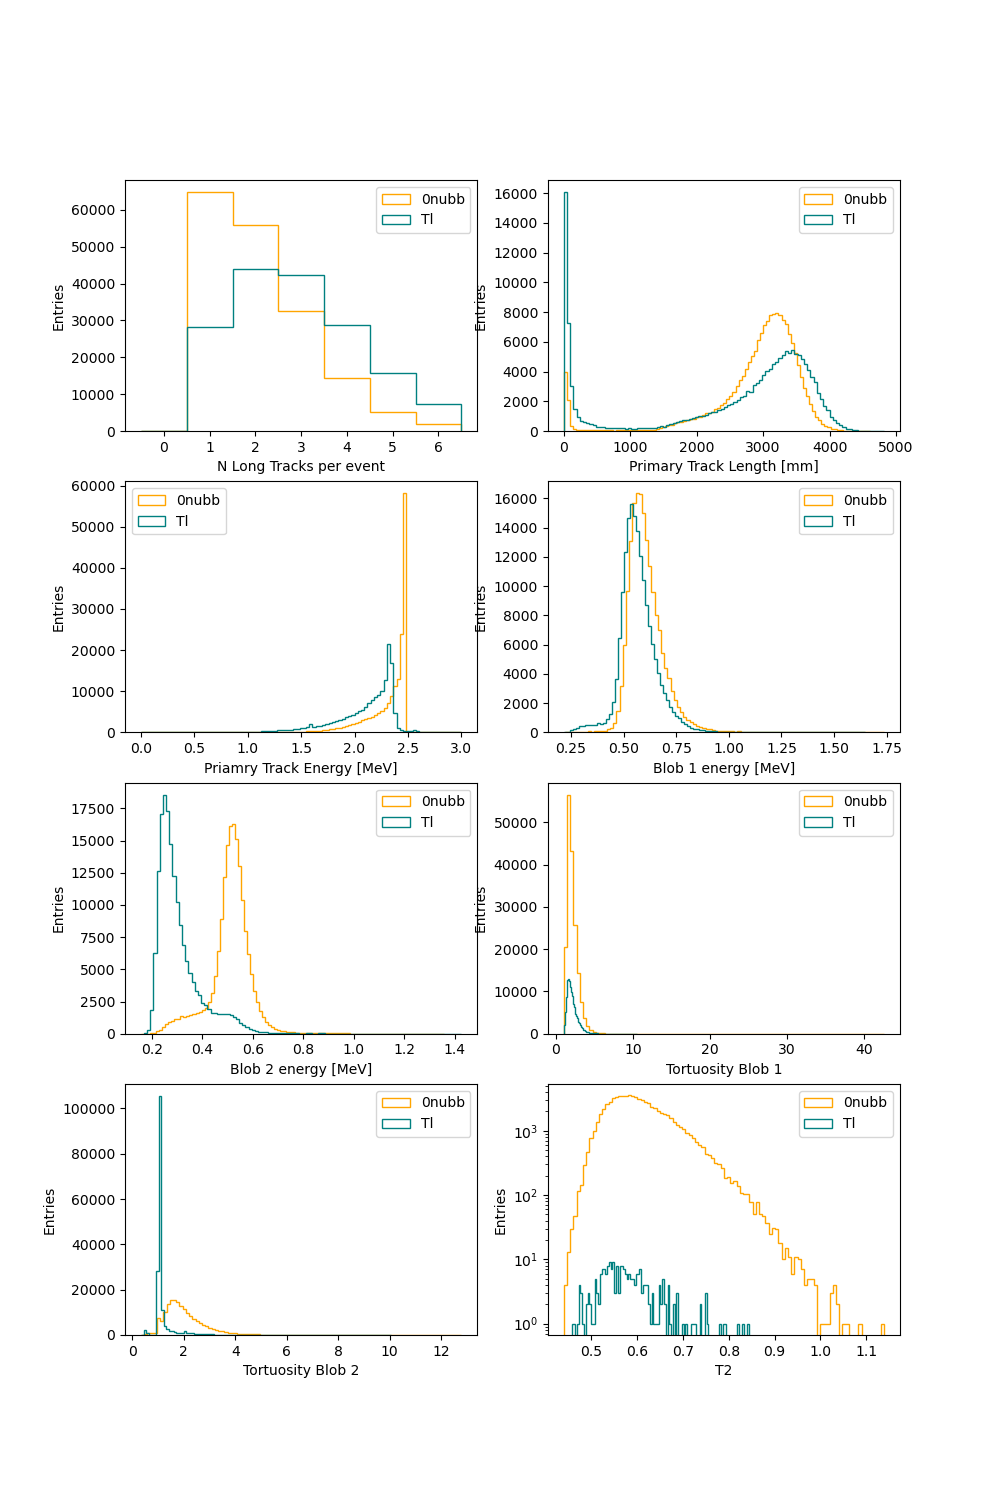

In [121]:
# Plot some variables like number of tracks


def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


nubb_counts = GetNLongTracks(nubb_meta)
Tl_counts = GetNLongTracks(Tl_meta)
nubb_counts_evts = nubb_counts[nubb_counts.N_tracks <= 2].event_id.unique()
Tl_counts_evts = Tl_counts[Tl_counts.N_tracks <= 2].event_id.unique()


bin_edges = np.arange(-0.5, 7.5, 1)
bin_centers = np.arange(0, 7, 1)


fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Multiplicities
axs[0,0].hist(nubb_counts.N_tracks, bins = bin_edges, histtype="step", color = "orange", label = "0nubb");
axs[0,0].hist(Tl_counts.N_tracks, bins = bin_edges, histtype="step", color = "Teal", label = "Tl");
axs[0,0].set_xlabel("N Long Tracks per event")
axs[0,0].set_ylabel("Entries")
axs[0,0].set_xticks(bin_centers) ;
axs[0,0].legend()


nubb_primary = nubb_meta[nubb_meta.primary == 1]
Tl_primary = Tl_meta[Tl_meta.primary == 1]

axs[1,0].hist(nubb_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = "orange", label = "0nubb");
axs[1,0].hist(Tl_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = "Teal", label = "Tl");
axs[1,0].set_xlabel("Priamry Track Energy [MeV]")
axs[1,0].set_ylabel("Entries")
axs[1,0].legend()

axs[0,1].hist(nubb_primary.length, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[0,1].hist(Tl_primary.length, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[0,1].set_xlabel("Primary Track Length [mm]")
axs[0,1].set_ylabel("Entries")
axs[0,1].legend()

axs[1,1].hist(nubb_primary.blob1, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[1,1].hist(Tl_primary.blob1, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[1,1].set_xlabel("Blob 1 energy [MeV]")
axs[1,1].set_ylabel("Entries")
axs[1,1].legend()

axs[2,0].hist(nubb_primary.blob2, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[2,0].hist(Tl_primary.blob2, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[2,0].set_xlabel("Blob 2 energy [MeV]")
axs[2,0].set_ylabel("Entries")
axs[2,0].legend()

axs[2,1].hist(nubb_primary.Tortuosity1, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[2,1].hist(Tl_primary.Tortuosity1, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[2,1].set_xlabel("Tortuosity Blob 1")
axs[2,1].set_ylabel("Entries")
axs[2,1].legend()

axs[3,0].hist(nubb_primary.Tortuosity2, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[3,0].hist(Tl_primary.Tortuosity2, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[3,0].set_xlabel("Tortuosity Blob 2")
axs[3,0].set_ylabel("Entries")
axs[3,0].legend()


E_cut = 0.43
axs[3,1].hist(nubb_primary[ (nubb_primary.energy>2.4) & (nubb_primary.event_id.isin(nubb_counts_evts)) & (nubb_primary.blob2 > E_cut) ].blob1, bins = 100, histtype="step", color = "orange", label = "0nubb");
axs[3,1].hist(Tl_primary[ (Tl_primary.energy>2.4) & (Tl_primary.event_id.isin(Tl_counts_evts)) & (Tl_primary.blob2 > E_cut) ].blob1, bins = 100, histtype="step", color = "Teal", label = "Tl");
axs[3,1].set_xlabel("T2")
axs[3,1].set_ylabel("Entries")
axs[3,1].legend()
axs[3,1].semilogy()

nubb_topology_evts = nubb_primary[ (nubb_primary.energy>2.4) & (nubb_primary.event_id.isin(nubb_counts_evts)) & (nubb_primary.blob2 > E_cut) & (nubb_primary.Tortuosity2 > 1.5) ].event_id.unique()
Tl_topology_evts = Tl_primary[ (Tl_primary.energy>2.4) & (Tl_primary.event_id.isin(Tl_counts_evts)) & (Tl_primary.blob2 > E_cut) & (Tl_primary.Tortuosity2 > 1.5) ].event_id.unique()


print(len(nubb.event_id.unique()), len(nubb_topology_evts), " Eff = ", 100 * len(nubb_topology_evts)/len(nubb.event_id.unique()))
print(len(Tl.event_id.unique()), len(Tl_topology_evts), " Eff = ", 100 * len(Tl_topology_evts)/len(Tl.event_id.unique()))

print("FOM:", len(nubb_topology_evts)/len(nubb.event_id.unique())/np.sqrt(len(Tl_topology_evts)/len(Tl.event_id.unique())))


print(Tl_topology_evts) 


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,125,0,1,14,111,3339.136,2.457110,0.625530,0.545402,2.199838,2.334565,Primary
0,126,0,1,35,64,3483.548,2.437890,0.598350,0.569433,1.835691,2.562163,Primary
0,126,1,0,0,0,0.000,0.022494,0.022494,0.022494,1.000000,1.000000,Brem
0,129,0,1,87,128,3064.258,2.460284,0.637062,0.544509,2.157897,1.603760,Primary
0,132,0,1,48,98,3230.732,2.457630,0.641328,0.497265,1.781229,1.910458,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1302,0,1,1,80,2786.241,2.436005,0.705411,0.565961,1.513373,3.173665,Primary
0,1302,1,0,40,66,85.501,0.023684,0.023684,0.023684,1.000000,1.000000,Delta0
0,1303,0,1,11,83,3379.142,2.464996,0.691746,0.481963,1.522068,2.015349,Primary
0,1309,0,1,22,91,3501.699,2.434517,0.541880,0.518965,3.003698,1.610181,Primary


11


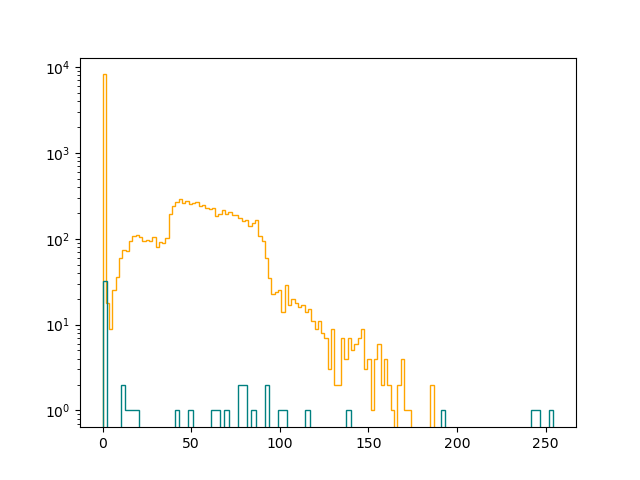

In [105]:
nubb_meta_filt = nubb_meta[(nubb_meta.event_id.isin(nubb_topology_evts))]
Tl_meta_filt = Tl_meta[(Tl_meta.event_id.isin(Tl_topology_evts))]

display(nubb_meta_filt)

plt.figure()
plt.hist(nubb_meta_filt[nubb_meta_filt.primary == 0].length, bins = 100, histtype="step", color = "orange", label = "0nubb");
plt.hist(Tl_meta_filt[Tl_meta_filt.primary == 0].length, bins = 100, histtype="step", color = "Teal", label = "Tl");
plt.semilogy()

print(len(Tl_meta_filt[ (Tl_meta_filt.primary == 0) & (Tl_meta_filt.energy > 0.07)]))


[]

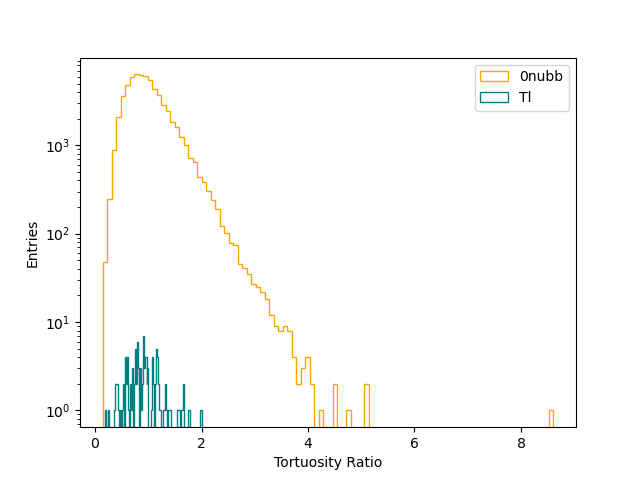

In [107]:
plt.figure()
plt.hist(nubb_meta_filt[nubb_meta_filt.primary == 1].Tortuosity1/nubb_meta_filt[nubb_meta_filt.primary == 1].Tortuosity2, bins = 100, histtype="step", color = "orange", label = "0nubb");
plt.hist(Tl_meta_filt[Tl_meta_filt.primary == 1].Tortuosity1/Tl_meta_filt[Tl_meta_filt.primary == 1].Tortuosity2, bins = 100, histtype="step", color = "Teal", label = "Tl");
plt.xlabel("Tortuosity Ratio")
plt.ylabel("Entries")
plt.legend()
plt.semilogy()


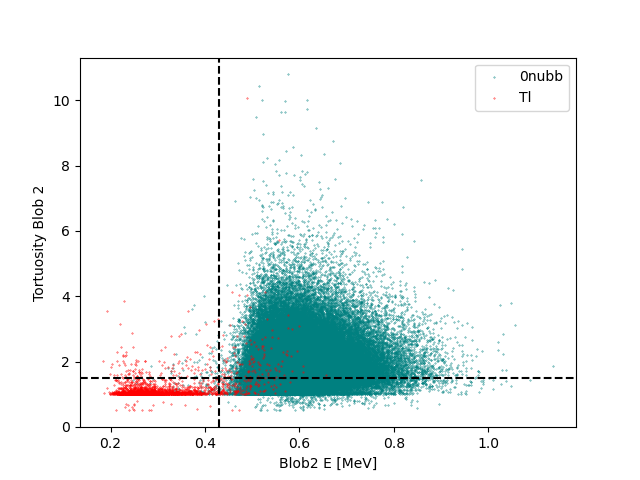

In [76]:
plt.figure()

nubb_1track = nubb_primary[(nubb_primary.event_id.isin(nubb_counts_evts)) & ((nubb_primary.energy>2.4))]
Tl_1track = Tl_primary[(Tl_primary.event_id.isin(Tl_counts_evts)) & ((Tl_primary.energy>2.4))]


plt.scatter(nubb_1track.blob1, nubb_1track.Tortuosity2, s=0.1, label = "0nubb", color = "Teal")
plt.scatter(Tl_1track.blob2, Tl_1track.Tortuosity2, s=0.1, label = "Tl", color = "red")
plt.xlabel("Blob2 E [MeV]")
plt.ylabel("Tortuosity Blob 2")
plt.legend()
plt.axhline(y=1.5, color='black', linestyle='--')
plt.axvline(x=0.43, color='black', linestyle='--')

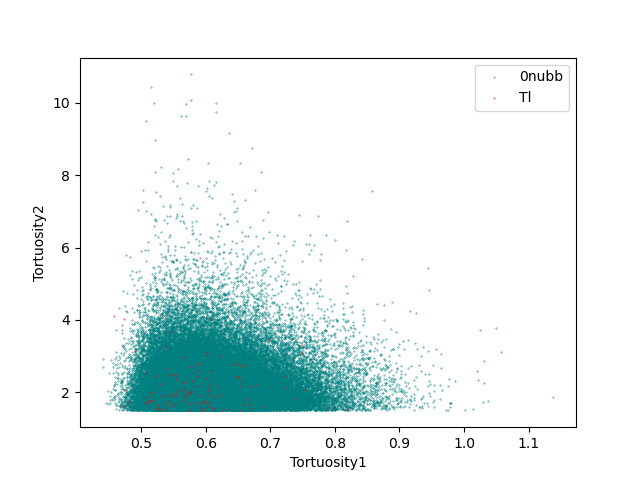

In [80]:
nubb_selected = nubb_primary[(nubb_primary.event_id.isin(nubb_topology_evts))]
Tl_selected = Tl_primary[(Tl_primary.event_id.isin(Tl_topology_evts))]


plt.figure()
# plt.hist(nubb_selected.Tortuosity1/nubb_selected.Tortuosity2, bins = 100, histtype="step", color = "orange", label = "0nubb");
# plt.hist(Tl_selected.Tortuosity1/Tl_selected.Tortuosity2, bins = 100, histtype="step", color = "Teal", label = "Tl");
plt.scatter(nubb_selected.blob1, nubb_selected.Tortuosity2, s=0.1, label = "0nubb", color = "Teal")
plt.scatter(Tl_selected.blob1, Tl_selected.Tortuosity2, s=0.1, label = "Tl", color = "red")

plt.xlabel("Tortuosity1")
plt.ylabel("Tortuosity2")
plt.legend()
# plt.semilogy()



119


NameError: name 'file_' is not defined

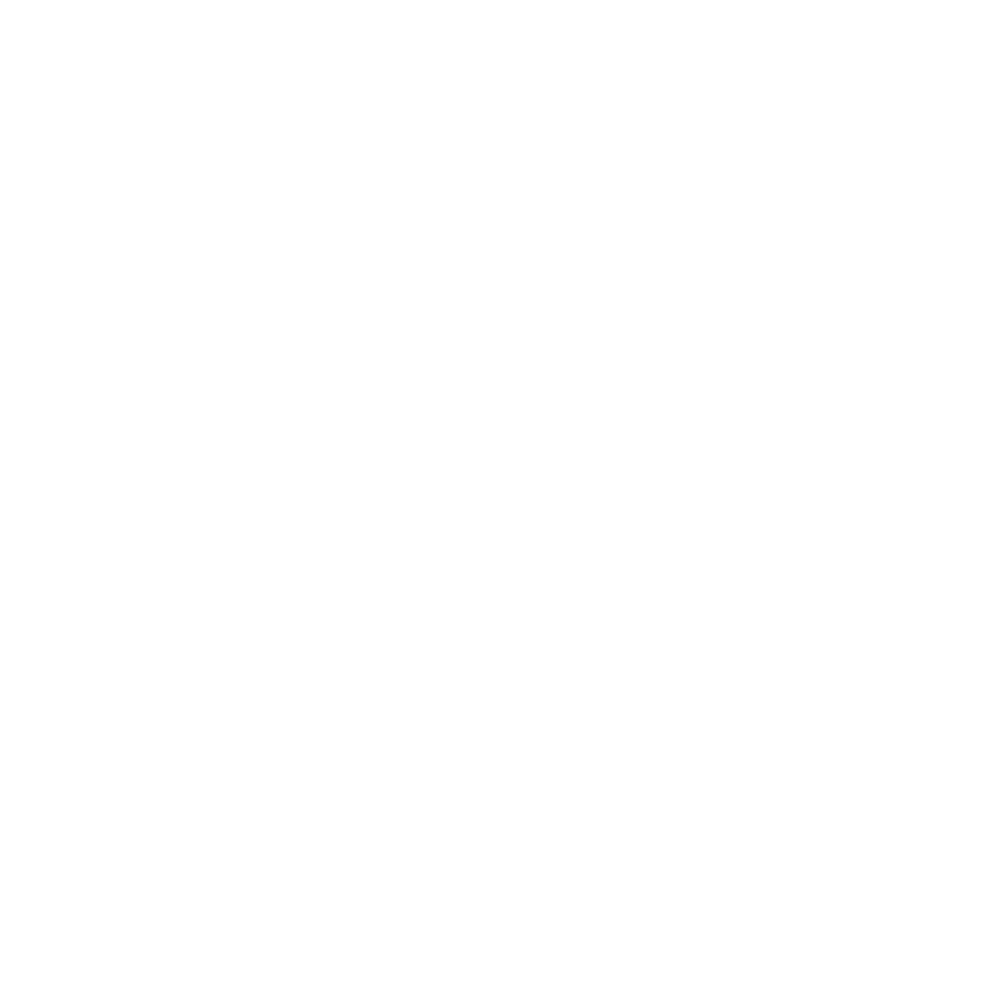

In [123]:
# Save all the background events

# 3D event display
%matplotlib widget

print(len(Tl_topology_evts))

# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]
#     event.index = event.id
#     Track = Tracks_Tl[evid]
#     connection = connections_Tl[evid]
#     connection_count = connection_counts_Tl[evid]

#     # Tortuosity plot
#     plt.figure()
#     plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k")
#     plt.xlabel("Cumulative Length [mm]")
#     plt.ylabel("Tortuosity")
#     plt.title(f"Event {evid}")
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}_Tortuosity.pdf")

#     if i == 0:
#         plt.show()  # Show only the first figure
#     else:
#         plt.close()  # Close the figure to avoid displaying

#     # Create subplots for 3D projections
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#     # Plot projections
#     plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
#     plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
#     plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

#     fig.suptitle(f"Event {evid}")

#     plt.tight_layout()
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}.pdf")
    
#     plt.close(fig)  # Close the figure after saving to prevent display


def PlotEvent3D(event_hits, axis, title, eid):

    # Create 3D axes
    ax = fig.add_subplot(axis, projection='3d')

    fig.set_facecolor('black')
    ax.set_facecolor('black')

    # Scatter plot in 3D
    sc = ax.scatter(event_hits.x, event_hits.y, event_hits.z, 
                    c=event_hits.energy, cmap='Spectral', s=10, label="Reco hits")

    ax.set_xlabel("X [mm]", fontsize=15, color='white')
    ax.set_ylabel("Y [mm]", fontsize=15, color='white')
    ax.set_zlabel("Z [mm]", fontsize=15, color='white')

    # Set the color of the axes labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.zaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.tick_params(axis='z', colors='white')

    ax.set_title(title, fontsize=15, color='white')

    # Set dark theme
    ax.xaxis.pane.set_edgecolor("white")
    ax.yaxis.pane.set_edgecolor("white")
    ax.zaxis.pane.set_edgecolor("white")
    ax.grid(False)

    # Add colorbar
    cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label("Energy", fontsize=12, color='white')
    cbar.ax.yaxis.set_tick_params(color='white')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

    # Remove background (axis)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False


for i, evid in enumerate(Tl_topology_evts):
    fig = plt.figure(figsize=(10, 10))
    event = Tl[Tl.event_id == evid]

    PlotEvent3D(event, 111, f"Event {evid}", evid)

    plt.tight_layout()
    plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}_3D.pdf")
    
    plt.close(fig)  # Close the figure after saving to prevent display



In [72]:
# Calculate the tortuosity and add it to the dataframe
def CalcTortuosity2(df_angles):

    # df_angles['distance_diff'] = df_angles.groupby(['event_id', 'trkID'])['cumulative_distance'].diff().fillna(0)

    df_angles["Tortuosity2"] = 1.0

    Tortuosity = []

    window = 5

    for trkID in df_angles.trkID.unique():

        # Get the track
        trk_df = df_angles[df_angles.trkID == trkID]

        # Try to dynamically calculate the window size by splitting into 100 pieces
        window = int(len(trk_df)/100 + 1)
        if window < 5:
            window = 5

        window=2

        # Loop over the nodes in the track
        for index in range(len(trk_df)):

            start = max(0, index - window)  # Prevent going below index 0
            end = min(len(trk_df), index + window + 1)  # Prevent exceeding last index
            
            temp_df = trk_df.iloc[start:end]

            point1 = temp_df.iloc[0]
            point2 = temp_df.iloc[-1]
            segment_length = calculate_distance(point1, point2)

            # Avoids division by zero
            if (segment_length == 0):
                segment_length = 1

            # Get the diff between each row
            cum_distance = 0
            for i in range(1, len(temp_df)):
                
                prev_point = temp_df.iloc[i - 1][['x', 'y', 'z']].to_numpy()
                curr_point = temp_df.iloc[i][['x', 'y', 'z']].to_numpy()
                cum_distance+=euclidean_distance(curr_point,prev_point)

            Tortuosity.append(cum_distance/segment_length)

    df_angles["Tortuosity2"] = Tortuosity

    return df_angles


def GetEndTortuosity2(df, T_threshold):
    df_T1 = df[df.cumulative_distance > T_threshold]
    T1 = df_T1["Tortuosity2"].mean()

    end_threshold = max(df.cumulative_distance) - T_threshold
    df_T2 = df[ (df['cumulative_distance'] < end_threshold) & (df.cumulative_distance > T_threshold)]
    T2 = df_T2["Tortuosity2"].mean()

    if T1 == 0:
        T1 = 1.0
    if T2 == 0:
        T2 = 1.0

    return T1, T2

def CalcTortuosityEnergy(df_angles):

    # df_angles['distance_diff'] = df_angles.groupby(['event_id', 'trkID'])['cumulative_distance'].diff().fillna(0)

    df_angles["energyT"] = 1.0

    energyT = []

    window = 10

    for trkID in df_angles.trkID.unique():

        # Get the track
        trk_df = df_angles[df_angles.trkID == trkID]

        # Try to dynamically calculate the window size by splitting into 100 pieces
        window = int(len(trk_df)/100 + 1)
        if window < 5:
            window = 5

        # Loop over the nodes in the track
        for index in range(len(trk_df)):

            start = max(0, index - window)  # Prevent going below index 0
            end = min(len(trk_df), index + window + 1)  # Prevent exceeding last index
            
            temp_df = trk_df.iloc[start:end]

            point1 = temp_df.iloc[0]
            point2 = temp_df.iloc[-1]
            segment_length = calculate_distance(point1, point2)

            # Avoids division by zero
            if (segment_length == 0):
                segment_length = 1

            # Get the diff between each row
            cum_distance = 0
            for i in range(1, len(temp_df)):
                
                prev_point = temp_df.iloc[i - 1][['x', 'y', 'z']].to_numpy()
                curr_point = temp_df.iloc[i][['x', 'y', 'z']].to_numpy()
                prev_pointE = temp_df.iloc[i - 1].energy
                curr_pointE = temp_df.iloc[i].energy
                deltaE = np.abs(curr_pointE-prev_pointE)

                cum_distance+=euclidean_distance(curr_point,prev_point)*deltaE*1000

            energyT.append(cum_distance/segment_length)

    df_angles["energyT"] = energyT

    return df_angles

54648029


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_29928/2176354279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angles["Tortuosity2"] = 1.0
/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_29928/2176354279.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angles["Tortuosity2"] = Tortuosity
/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_29928/2176354279.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,event_id,x,y,z,energy,id,primary,trkID,cumulative_distance,angle,Tortuosity,Tortuosity2,energyT
0,54648029,2478.292969,-1273.713460,5030.784831,0.048013,1,1,0,0.000000,0.000000,1.452397,1.599376,153.623096
1,54648029,2483.697876,-1254.957581,5030.601562,0.006547,3,1,0,19.519980,153.099473,1.328720,1.882694,139.231060
2,54648029,2506.888346,-1271.461955,5016.370443,0.169037,2,1,0,51.343196,106.998616,1.269325,1.592798,115.938448
3,54648029,2502.693115,-1238.730184,5017.069824,0.039110,4,1,0,84.350133,128.053806,1.243437,1.487894,107.385335
4,54648029,2519.453613,-1225.266602,5007.156250,0.003571,5,1,0,108.024197,62.282781,1.226478,1.129665,101.782743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,54648029,2551.688965,-62.862747,5546.518555,0.013913,72,1,0,2852.810597,65.855730,2.016355,1.829640,26.729534
118,54648029,2554.033691,-46.257751,5542.606283,0.026486,78,1,0,2870.030629,93.505613,2.007316,2.454995,28.651741
119,54648029,2557.168457,-48.475903,5551.170898,0.071126,77,1,0,2879.416767,112.936709,2.324175,2.235629,27.343731
120,54648029,2545.258057,-49.909859,5557.016602,0.090594,76,1,0,2892.761658,82.702357,2.468303,1.316758,43.060122


1.2661495916221315 1.1577122295026419
   event_id  trkID  primary  start  end    length    energy     blob1  \
0  54648029      0        1      1   76  2892.762  2.545075  0.565862   
0  54648029      1        0      0    0     0.000  0.029686  0.029686   

      blob2  Tortuosity1  Tortuosity2    label  
0  0.514848     1.250724     1.788242  Primary  
0  0.029686     1.000000     1.000000     Brem  


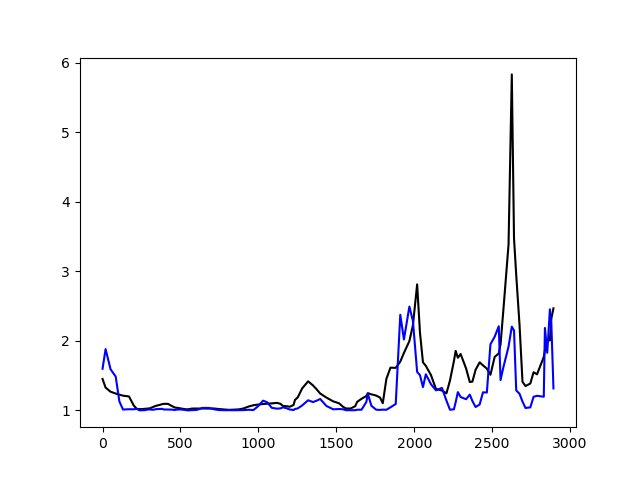

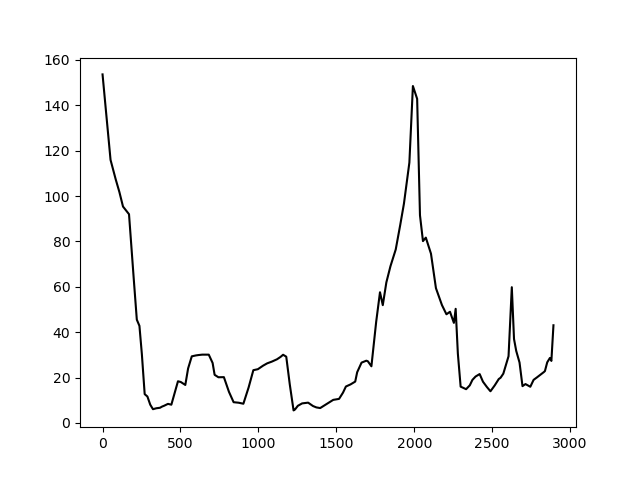

In [75]:
# See if any refinements to the blob and tortuality can be made

event_bkg = Tl_topology_evts[4]
event_bkg=54648029
print(event_bkg)

Tl_cuts = Tl[Tl.event_id.isin([event_bkg])]

Tl_cuts = CalcTortuosity2(Tl_cuts)

Tl_cuts = CalcTortuosityEnergy(Tl_cuts)

display(Tl_cuts)

plt.figure()

T1, T2 = GetEndTortuosity2(Tl_cuts, 500)
print(T1,T2)
print(Tl_meta[Tl_meta.event_id == 54648029])

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(Tl_cuts[ Tl_cuts.primary == 1 ].cumulative_distance, Tl_cuts[ Tl_cuts.primary == 1 ].Tortuosity, color="k");
plt.plot(Tl_cuts[ Tl_cuts.primary == 1 ].cumulative_distance, Tl_cuts[ Tl_cuts.primary == 1 ].Tortuosity2, color="b");

plt.figure()
plt.plot(Tl_cuts[ Tl_cuts.primary == 1 ].cumulative_distance, Tl_cuts[ Tl_cuts.primary == 1 ].energyT, color="k");